# 非線形決定境界

In [1]:
import cv2
kernels = [cv2.ml.SVM_LINEAR,
           cv2.ml.SVM_INTER,
           cv2.ml.SVM_SIGMOID,
           cv2.ml.SVM_RBF]

In [2]:
import numpy as np
from sklearn import datasets

X, y = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=7816)

X = X.astype(np.float32)
y = y * 2 - 1

from sklearn import model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

def plot_decision_boundary(svm, X_test, y_test):
    # 左右上下の端にデータ点がのることを避けるために、+1または-1の余白を入れている
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    
    # メッシュグリッドのサンプリング間隔
    h = 0.02
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    
    _, zz = svm.predict(X_hypo)
    
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=14)

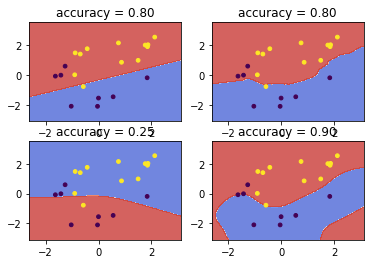

In [3]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

for idx, kernel in enumerate(kernels):
    svm = cv2.ml.SVM_create()
    svm.setKernel(kernel)
    svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
    _, y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    plt.subplot(2, 2, idx+1)
    plot_decision_boundary(svm, X_test, y_test)
    plt.title('accuracy = %.2f' % accuracy)
plt.rcParams["figure.figsize"] = (20, 15)
plt.show()